In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
import requests
from tqdm import tqdm
import re

In [2]:
tqdm.pandas()

In [3]:
df = pd.read_csv('classified_ads_post_corr.csv')


1. Pre-process dataframe for further analysis

In [4]:
df['gen_positions_list'] = df['gen_positions'].str.findall(r'<(.*?)>')
df_exploded = df.explode('gen_positions_list')
df_exploded = df_exploded.rename(columns={'gen_positions_list': 'position'}).reset_index(drop=True)
df_exploded = df_exploded[df_exploded['position'].notna() & (df_exploded['position'].str.strip() != '')]

Lemmatize the extracted positions

In [5]:
def lemmatize(token):
    if token.endswith('er'):
        return token
    
    url = f'https://www.deutschestextarchiv.de/demo/cab/query?a=default&fmt=text&clean=1&pretty=1&raw=1&q={token}'
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return(token)
    
    match = re.search(r'\[moot/lemma\] (\S+)', content)
    if match:
        lemma = match.group(1)
        return lemma
    else:
        print("The [moot/lemma] tag was not found.")

In [6]:
df_exploded['position'] = df_exploded['position'].progress_apply(lemmatize)

100%|██████████| 1412/1412 [05:57<00:00,  3.95it/s]


In [7]:
df_exploded

,page_id,pagenumber,paper_title,provider_ddb_id,provider,zdb_id,publication_date,place_of_distribution,language,thumbnail,...,true_ad,ID,HEIGHT,WIDTH,VPOS,HPOS,text,post_text,gen_positions,position
1,22KPDIU2CCI3K3INHQ2TVFLRDDZCICYM-FILE_0004_DDB...,4,Dresdner Journal : Königlich Sächsischer Staat...,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2889116-8,1914-03-28 12:00:00,['Dresden'],de,268a11f3-8b28-49b0-a081-e6b7396f8b84,...,1,Page1_Block11,670.0,586.0,589.0,3856.0,llffiriel'8«si8k\nsucht für einige Tagesstunde...,Friedrich sucht für einige Tagesstunden Be- sc...,<Gesellschafterin> <Begleiterin> <Malerin>,Gesellschafterin
2,22KPDIU2CCI3K3INHQ2TVFLRDDZCICYM-FILE_0004_DDB...,4,Dresdner Journal : Königlich Sächsischer Staat...,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2889116-8,1914-03-28 12:00:00,['Dresden'],de,268a11f3-8b28-49b0-a081-e6b7396f8b84,...,1,Page1_Block11,670.0,586.0,589.0,3856.0,llffiriel'8«si8k\nsucht für einige Tagesstunde...,Friedrich sucht für einige Tagesstunden Be- sc...,<Gesellschafterin> <Begleiterin> <Malerin>,Begleiterin
3,22KPDIU2CCI3K3INHQ2TVFLRDDZCICYM-FILE_0004_DDB...,4,Dresdner Journal : Königlich Sächsischer Staat...,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2889116-8,1914-03-28 12:00:00,['Dresden'],de,268a11f3-8b28-49b0-a081-e6b7396f8b84,...,1,Page1_Block11,670.0,586.0,589.0,3856.0,llffiriel'8«si8k\nsucht für einige Tagesstunde...,Friedrich sucht für einige Tagesstunden Be- sc...,<Gesellschafterin> <Begleiterin> <Malerin>,Malerin
4,22KPDIU2CCI3K3INHQ2TVFLRDDZCICYM-FILE_0004_DDB...,4,Dresdner Journal : Königlich Sächsischer Staat...,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2889116-8,1914-03-28 12:00:00,['Dresden'],de,268a11f3-8b28-49b0-a081-e6b7396f8b84,...,1,Page1_Block25,194.0,1820.0,2394.0,763.0,Juristischer Hilfsarbeiter (Volontär)\nkann be...,Juristischer Hilfsarbeiter (Volontär) kann bei...,<Hilfsarbeiter>,Hilfsarbeiter
15,245ECWT2STGKDCQLHWKXHAROOHCZZF7T-FILE_0012_DDB...,12,Leipziger Tageblatt und Handelszeitung : Amtsb...,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2843671-4,1914-04-05 12:00:00,['Leipzig'],de,03a94fb8-5edb-4e58-bfad-3fa00a3e1bc5,...,1,Page1_Block43,140.0,607.0,5739.0,1674.0,"Damen-Artster-Unterr.,Schon-\nheitSpsiege, Man...","Damen=Artister=Unterr., Schon- heitspflege, Ma...",<Damen-Artister> <Schonheitspflege> <Maniture>,Damen-Artister
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,2GRIAGZDDFBXOZW5EXM7E4VCYSD6QXSH-FILE_0034_DDB...,34,Hamburger Fremdenblatt,BZVTR553HLJBDMQD5NCJ6YKP3HMBQRF4,Staats- und Universitätsbibliothek Hamburg Car...,3024925-9,1914-01-08 12:00:00,['Hamburg'],de,25b6c7a8-bbc0-4907-b807-1e447744bdbe,...,1,Page1_Block224,373.0,564.0,4818.0,3743.0,C*albini>alibc sucht Besämlti-\n*v nun«. Biehf...,"Halbmann sucht Beschäfti- gung, Biehfütteru od...",<Halbmann> <Kontorboten> <Hausknechte> <Packer...,Halbmann
1972,2GRIAGZDDFBXOZW5EXM7E4VCYSD6QXSH-FILE_0034_DDB...,34,Hamburger Fremdenblatt,BZVTR553HLJBDMQD5NCJ6YKP3HMBQRF4,Staats- und Universitätsbibliothek Hamburg Car...,3024925-9,1914-01-08 12:00:00,['Hamburg'],de,25b6c7a8-bbc0-4907-b807-1e447744bdbe,...,1,Page1_Block224,373.0,564.0,4818.0,3743.0,C*albini>alibc sucht Besämlti-\n*v nun«. Biehf...,"Halbmann sucht Beschäfti- gung, Biehfütteru od...",<Halbmann> <Kontorboten> <Hausknechte> <Packer...,Kontorbote
1973,2GRIAGZDDFBXOZW5EXM7E4VCYSD6QXSH-FILE_0034_DDB...,34,Hamburger Fremdenblatt,BZVTR553HLJBDMQD5NCJ6YKP3HMBQRF4,Staats- und Universitätsbibliothek Hamburg Car...,3024925-9,1914-01-08 12:00:00,['Hamburg'],de,25b6c7a8-bbc0-4907-b807-1e447744bdbe,...,1,Page1_Block224,373.0,564.0,4818.0,3743.0,C*albini>alibc sucht Besämlti-\n*v nun«. Biehf...,"Halbmann sucht Beschäfti- gung, Biehfütteru od...",<Halbmann> <Kontorboten> <Hausknechte> <Packer...,Hausknecht
1974,2GRIAGZ

2. Get frequencies of the positions

In [8]:
position_counts = df_exploded['position'].value_counts()
position_counts_df = position_counts.reset_index()
position_counts_df.columns = ['position', 'count']

In [9]:
position_counts_df = position_counts_df.sort_values(by='count', ascending=False)

In [10]:
print(position_counts_df)


            position  count
0           Lehrling     64
1          Vertreter     39
2             Kochin     30
3            Mädchen     27
4           Kaufmann     26
..               ...    ...
362     Filialfeiter      1
363     Klemmmädchen      1
364      adinetterin      1
365  Novembermädchen      1
771       Hausknecht      1

[772 rows x 2 columns]


3. Plot 10 most frequent positions

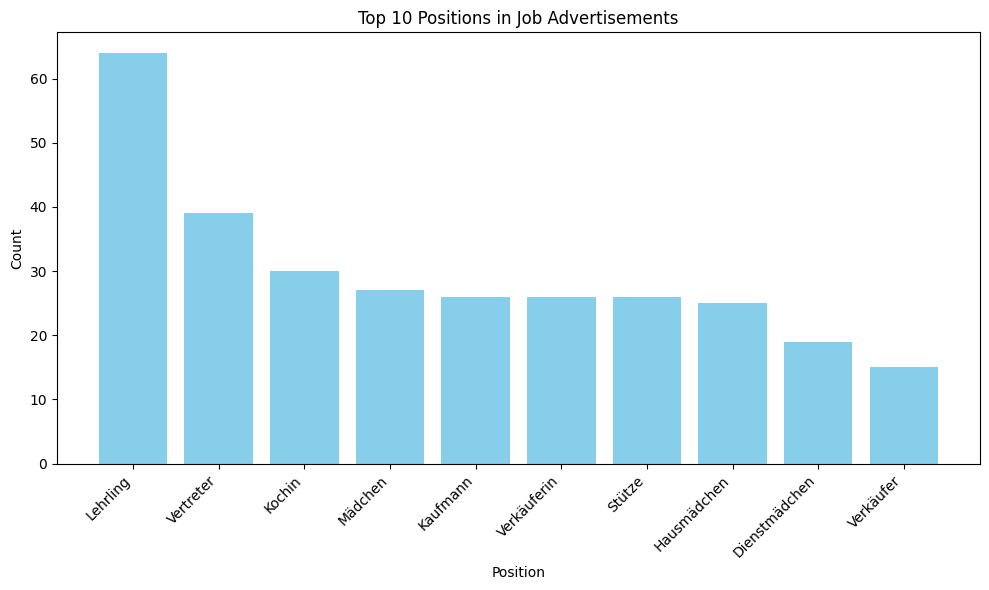

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(position_counts_df['position'].head(10), position_counts_df['count'].head(10), color='skyblue')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Top 10 Positions in Job Advertisements')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Plot 3 most frequent positions for Berlin, Hamburg and Dresden

C:\Users\venglaro\AppData\Local\Temp\ipykernel_10440\1429575063.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_positions['position'] = top_3_positions['position'].str.strip()  # Clean whitespace if necessary


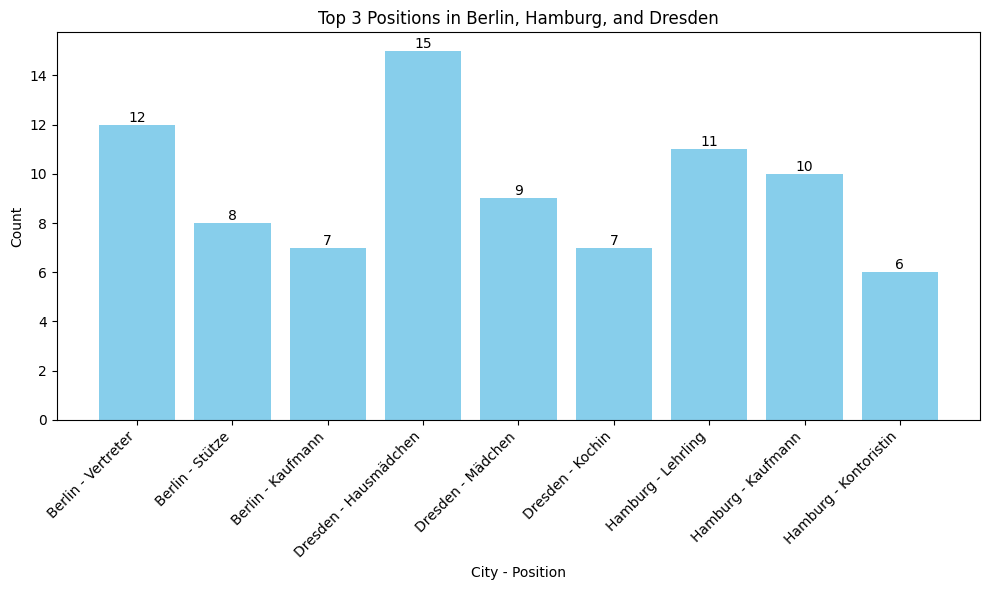

In [12]:
df_exploded['place_of_distribution'] = df_exploded['place_of_distribution'].apply(ast.literal_eval)
df_exploded_city = df_exploded.explode('place_of_distribution')

cities_of_interest = ['Berlin', 'Hamburg', 'Dresden']
df_filtered = df_exploded_city[df_exploded_city['place_of_distribution'].isin(cities_of_interest)]
position_counts = df_filtered.groupby(['place_of_distribution', 'position']).size().reset_index(name='count')

top_positions_by_city = position_counts.sort_values(by=['place_of_distribution', 'count'], ascending=[True, False])
top_3_positions = top_positions_by_city.groupby('place_of_distribution').head(3)
top_3_positions['position'] = top_3_positions['position'].str.strip()  # Clean whitespace if necessary
top_3_positions.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_3_positions['place_of_distribution'] + ' - ' + top_3_positions['position'], 
               top_3_positions['count'], color='skyblue')

plt.xlabel('City - Position')
plt.ylabel('Count')
plt.title('Top 3 Positions in Berlin, Hamburg, and Dresden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

5. Explore gender aspects in job advertisements

In [13]:
female_indicators = ['mädchen', 'frau', 'magd', 'fräulein', 'lady', 'bonne', 'dame', 'gouvernante', 'madam', 'mademoiselle', 'woman', 'mädel']
male_indicators = ['mann', 'herr', 'bursche', 'junge', 'knabe', 'knecht']

female_suffixes = ['in', 'innen', 'euse', 'mme', 'ice']
male_suffixes = ['er', 'eur', 'ren', 'ar', 'or', 'jung', 'är', 'ent', 'aph', 'ist', 'chef', 'et', 'at', 'ant', 'mis']


In [14]:
def determine_gender(position):
    if any(indicator in position.lower() for indicator in female_indicators):
        return 'female'
    elif any(indicator in position.lower() for indicator in male_indicators):
        return 'male'
    elif any(position.lower().endswith(suffix) for suffix in female_suffixes):
        return 'female'
    elif any(position.lower().endswith(suffix) for suffix in male_suffixes):
        return 'male'
    else:
        return 'neutral'

In [15]:
df_exploded['gender'] = df_exploded['position'].apply(determine_gender)	

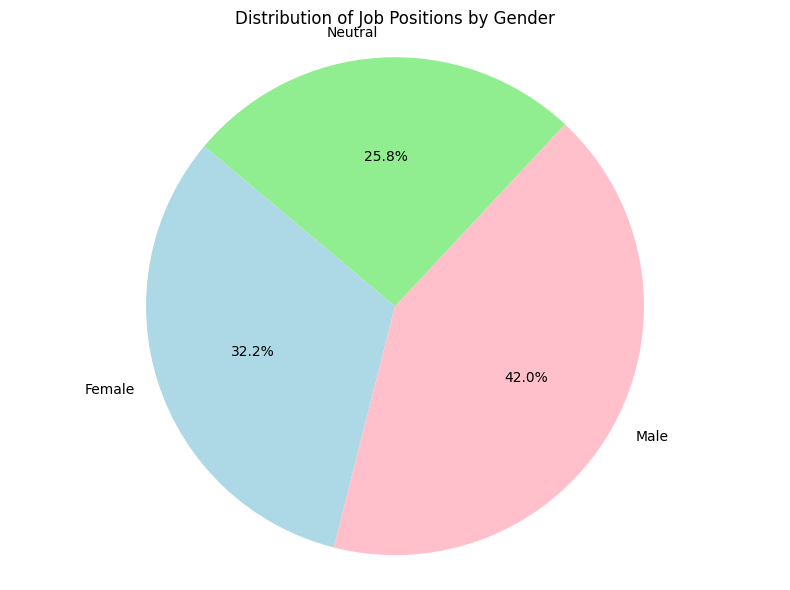

In [16]:
female_count = df_exploded[df_exploded['gender'] == 'female']['position'].count()
male_count = df_exploded[df_exploded['gender'] == 'male']['position'].count()
neutral_count = df_exploded[df_exploded['gender'] == 'neutral']['position'].count()

# Data for the pie chart
labels = ['Female', 'Male', 'Neutral']
sizes = [female_count, male_count, neutral_count]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgreen'], startangle=140)

# Adding title
plt.title('Distribution of Job Positions by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()  # Adjust the layout to make room for the title
plt.show()

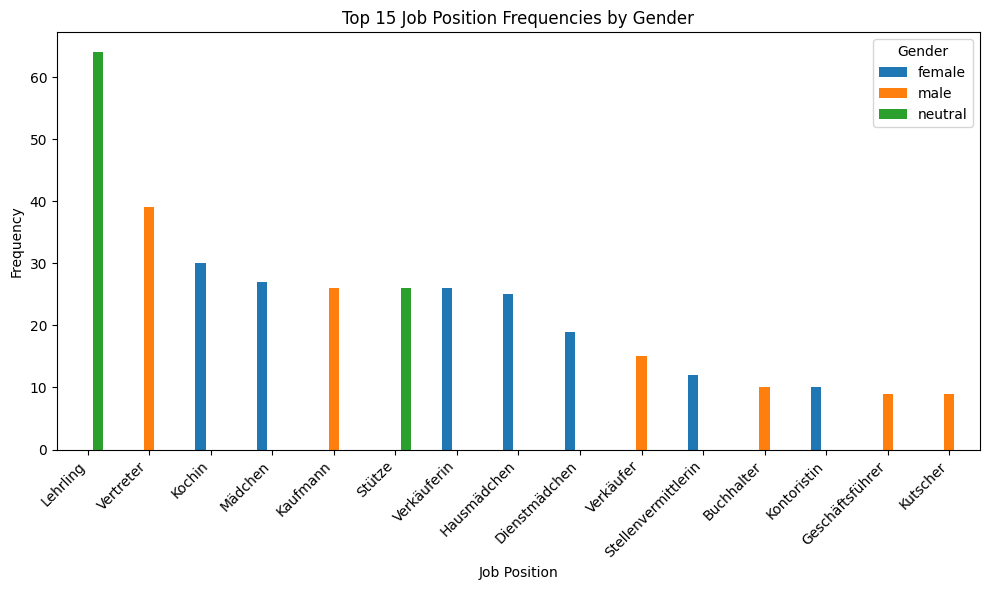

In [17]:
# TOP 15 positions by gender:

# Create a DataFrame with frequencies
df_frequencies = df_exploded.groupby(['position', 'gender']).size().unstack(fill_value=0)

# Sort the DataFrame by total frequency (across all genders) and select the top 15 positions
df_frequencies['Total'] = df_frequencies.sum(axis=1)
df_top15 = df_frequencies.nlargest(15, 'Total').drop(columns='Total')

# Plotting the grouped bar chart for the top 15 positions
df_top15.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Top 15 Job Position Frequencies by Gender')
plt.xlabel('Job Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.tight_layout()

# Show the plot
plt.show()

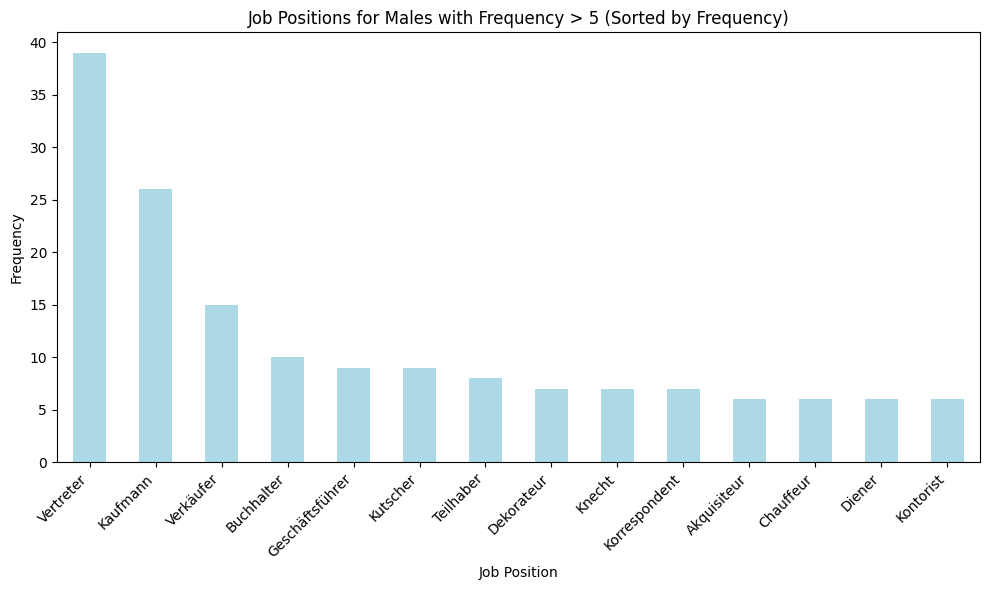

In [18]:
# Show most frequent male positions

male_frequencies = df_exploded[df_exploded['gender'] == 'male'].groupby('position').size()

# Filter for positions with frequency greater than 5
male_frequencies_filtered = male_frequencies[male_frequencies > 5]

# Sort the filtered frequencies in descending order
male_frequencies_sorted = male_frequencies_filtered.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
male_frequencies_sorted.plot(kind='bar', color='lightblue')

plt.title('Job Positions for Males with Frequency > 5 (Sorted by Frequency)')
plt.xlabel('Job Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

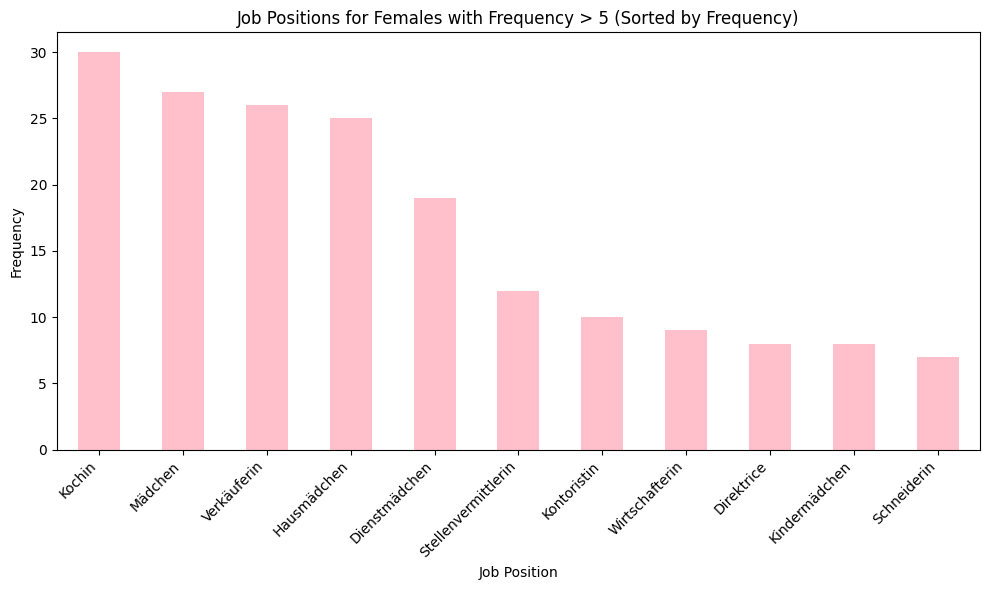

In [19]:
# Show most frequent female positions

female_frequencies = df_exploded[df_exploded['gender'] == 'female'].groupby('position').size()

# Filter for positions with frequency greater than 5
female_frequencies_filtered = female_frequencies[female_frequencies > 5]

# Sort the filtered frequencies in descending order
female_frequencies_sorted = female_frequencies_filtered.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
female_frequencies_sorted.plot(kind='bar', color='pink')

plt.title('Job Positions for Females with Frequency > 5 (Sorted by Frequency)')
plt.xlabel('Job Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

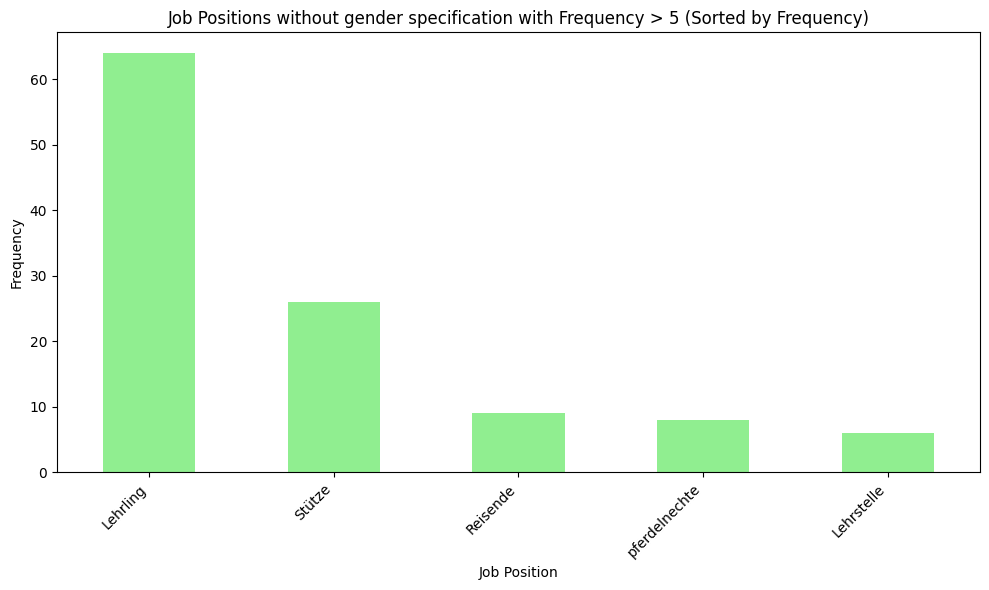

In [20]:
# Show most frequent positions without a specified gender

neutral_frequencies = df_exploded[df_exploded['gender'] == 'neutral'].groupby('position').size()

# Filter for positions with frequency greater than 5
neutral_frequencies_filtered = neutral_frequencies[neutral_frequencies > 5]

# Sort the filtered frequencies in descending order
neutral_frequencies_sorted = neutral_frequencies_filtered.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
neutral_frequencies_sorted.plot(kind='bar', color='lightgreen')

plt.title('Job Positions without gender specification with Frequency > 5 (Sorted by Frequency)')
plt.xlabel('Job Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()